In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('../../data/per-capita-ghg-emissions.csv')

# Filter the DataFrame to include only the years from 2010 onwards
df_filtered = df[df['Year'] >= 2010]

# Group the data by country code
grouped = df_filtered.groupby('Code')

# Function to calculate percentage reduction for each country
def calculate_percentage_reduction(group):
    if 2010 in group['Year'].values:
        start_year_emission = group[group['Year'] == 2010]['Per-capita greenhouse gas emissions in CO₂ equivalents'].values[0]
        end_year_emission = group[group['Year'] == group['Year'].max()]['Per-capita greenhouse gas emissions in CO₂ equivalents'].values[0]
        percentage_reduction = ((start_year_emission - end_year_emission) / start_year_emission) * 100
    else:
        percentage_reduction = float('nan')  # Assign NaN if 2010 data is not available
    return percentage_reduction

# Create a new DataFrame with unique countries and their percentage reduction
percentage_reduction_df = grouped.apply(calculate_percentage_reduction).reset_index()
percentage_reduction_df.columns = ['Code', 'Percentage Reduction']

# Optional: Merge with country names or other relevant information if needed
# Example:
# percentage_reduction_df = df[['Code', 'Country']].drop_duplicates().merge(percentage_reduction_df, on='Code', how='left')

# Output the new DataFrame
percentage_reduction_df.head()

,Code,Percentage Reduction
0,AFG,20.375948
1,AGO,52.263295
2,ALB,7.568916
3,AND,34.203987
4,ARE,-17.575822


In [ ]:
import pandas as pd

# Load the dataset
file_path = '../../data/urban-and-rural-population.csv'
df = pd.read_csv(file_path)

# Filter the dataframe for the year 2022
df_2022 = df[df['Year'] == 2022].copy()
df_2022 = df_2022[['Code', 'Year', 'Urban population']]

df_2022.head()

,Code,Year,Urban population
62,AFG,2022,10946834
125,ALB,2022,1772138
188,DZA,2022,33575039
251,ASM,2022,38604
314,AND,2022,70094


In [ ]:
# Load the dataset
file_path = '../../data/population-and-demography.csv'
df_pop = pd.read_csv(file_path)

# Filter the dataframe for the year 2022
df_pop = df_pop[df_pop['Year'] == 2022]
df_pop = df_pop.rename(columns={'Population - Sex: all - Age: all - Variant: estimates': 'Population'})

df_region = pd.read_csv('region_mapping.csv')
df_region = df_region[['alpha-3', 'region']]

df_pop = df_pop.merge(df_region, left_on='Code', right_on='alpha-3')
df_pop.head()

,Entity,Code,Year,Population,alpha-3,region
0,Afghanistan,AFG,2022,40578846,AFG,Asia
1,Albania,ALB,2022,2827615,ALB,Europe
2,Algeria,DZA,2022,45477391,DZA,Africa
3,American Samoa,ASM,2022,48365,ASM,Oceania
4,Andorra,AND,2022,79722,AND,Europe


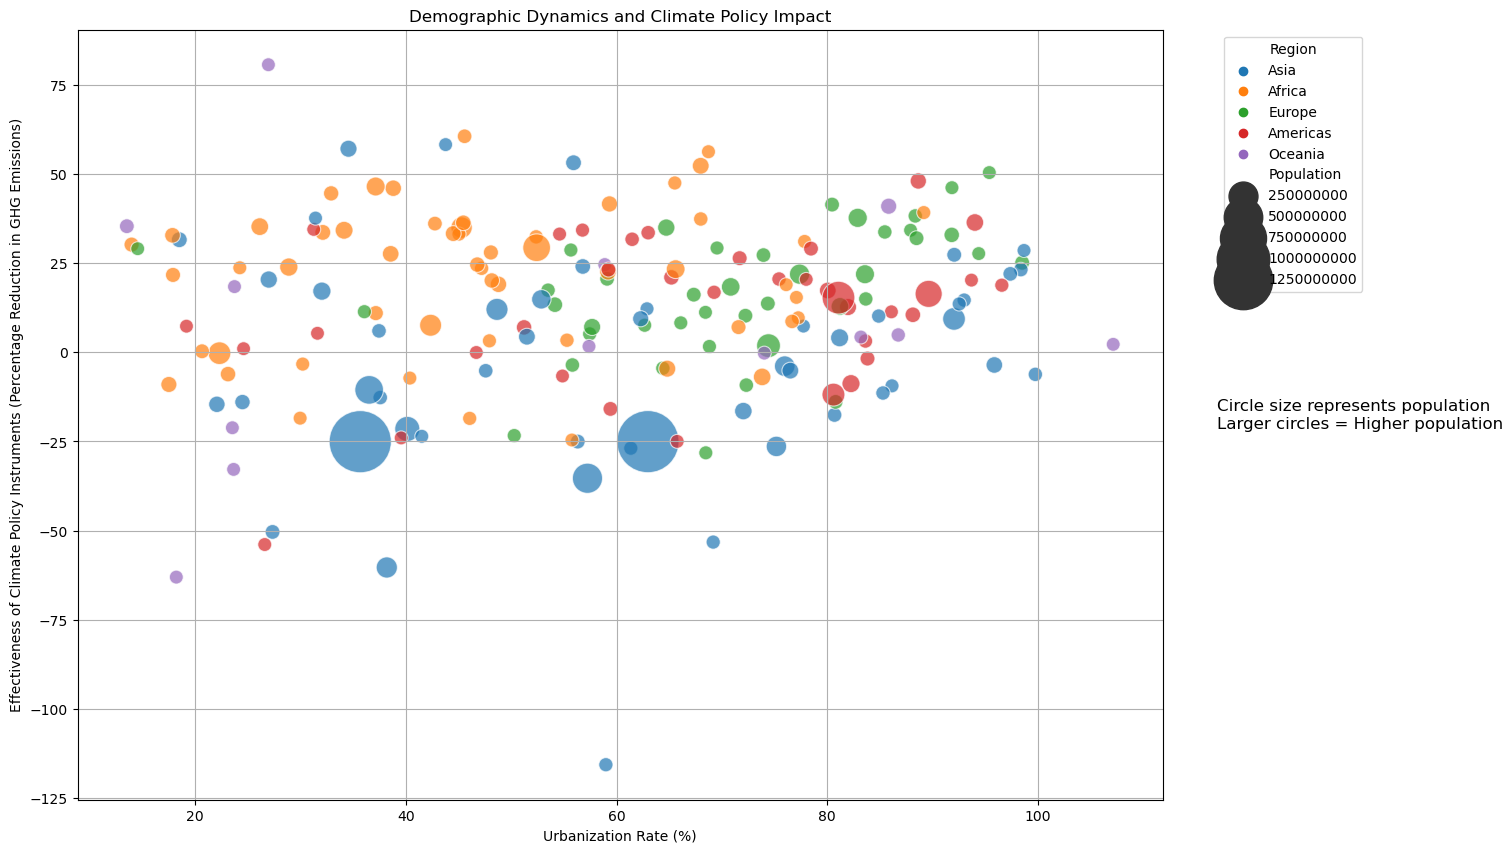

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already created the following dataframes:
# 1. percentage_reduction_df with 'Code' and 'Percentage Reduction'
# 2. df_2022 with 'Code', 'Urban population'
# 3. df_pop with 'Code', 'Population', 'region'

# Merge the dataframes
merged_df = percentage_reduction_df.merge(df_2022, on='Code', how='inner')
merged_df = merged_df.merge(df_pop[['Code', 'Population', 'region']], on='Code', how='inner')

# Calculate urbanization rate and population growth rate
merged_df['Urbanization Rate'] = (merged_df['Urban population'] / merged_df['Population']) * 100

# Plotting the graph
plt.figure(figsize=(14, 10))
sns.scatterplot(
    data=merged_df,
    x='Urbanization Rate',
    y='Percentage Reduction',
    size='Population',
    hue='region',
    sizes=(100, 2000),  # Adjust this range to control the minimum and maximum size
    palette='tab10',
    alpha=0.7,
    edgecolor='w',
    legend='brief'  # Only show the hue legend
)

# Remove the size legend (Population)
handles, labels = plt.gca().get_legend_handles_labels()
legend = plt.legend(handles=handles[1:], labels=labels[1:], title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Demographic Dynamics and Climate Policy Impact')
plt.xlabel('Urbanization Rate (%)')
plt.ylabel('Effectiveness of Climate Policy Instruments (Percentage Reduction in GHG Emissions)')
plt.grid(True)

# Custom annotation for population size
plt.text(1.05, 0.5, 'Circle size represents population\nLarger circles = Higher population', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='center')

plt.show()